In [25]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [34]:
df = pd.read_csv("C:/Users/ASUS ROG/Downloads/archive/alzheimers_disease_data.csv")

df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [35]:
missing_values = df.isnull().sum()

print("Missing Values:\n", missing_values)

if missing_values.sum() == 0:
    print("No missing values in the DataFrame.")
else:
    print("There are missing values in the DataFrame.")

Missing Values:
 PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTa

In [36]:
df =df.drop(["PatientID","DoctorInCharge"], axis =1)

df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


## Splitting the Data

In [37]:
from sklearn.model_selection import train_test_split
    
# Separate features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## building the Models

### SVM (Support Vector Machine) baseline Model

In [41]:
from sklearn.svm import SVC

# Create the SVM model
svm_model_1 = SVC()

# Train the model
svm_model_1.fit(X_train, y_train)


SVC()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       277
           1       0.00      0.00      0.00       153

    accuracy                           0.64       430
   macro avg       0.32      0.50      0.39       430
weighted avg       0.41      0.64      0.50       430



c:\Users\ASUS ROG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS ROG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS ROG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


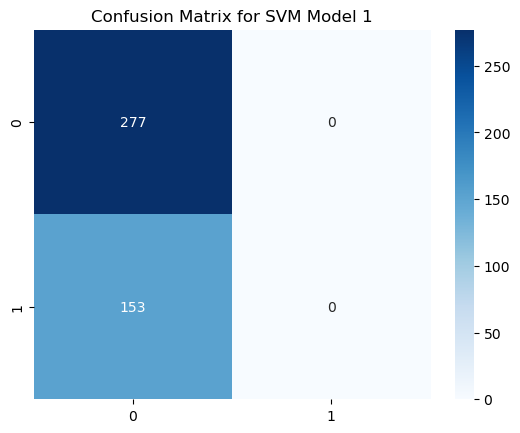

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


predictions_1 = svm_model_1.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, predictions_1))

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions_1)

# Display the confusion matrix as a graph using seaborn's heatmap function
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Model 1")
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],} #'kernel': ['rbf', 'poly', 'sigmoid']}

# Create the SVM model
svm_model = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'C': 1, 'gamma': 0.001}


### SVM - Model (2) Tuning of Kernel Parameter

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'kernel': ['rbf', 'poly', 'sigmoid']}

# Create the SVM model
svm_model_2 = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_model_2, param_grid, cv=5, verbose=1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters:  {'kernel': 'rbf'}


Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       277
           1       0.00      0.00      0.00       153

    accuracy                           0.64       430
   macro avg       0.32      0.50      0.39       430
weighted avg       0.41      0.64      0.50       430



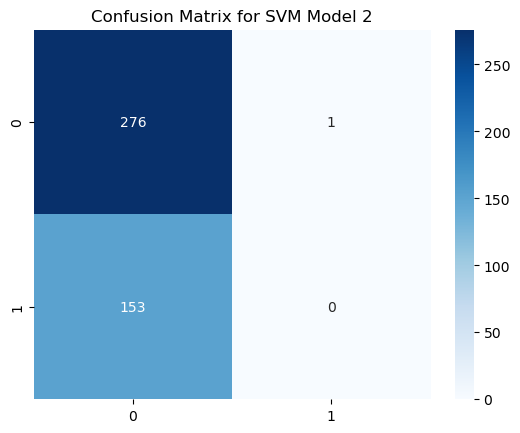

In [44]:
from sklearn.metrics import classification_report


# Create the SVM model with the best parameters
svm_model_2 = SVC(gamma=0.002, kernel=grid_search.best_params_['kernel'])

# Train the model
svm_model_2.fit(X_train, y_train)



# Evaluate Model 1
predictions_2 = svm_model_2.predict(X_test)
print("Model 1 Classification Report:")
print(classification_report(y_test, predictions_2))


# Create the confusion matrix
cm = confusion_matrix(y_test, predictions_2)

# Display the confusion matrix as a graph using seaborn's heatmap function
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Model 2")
plt.show()

### SVM - Model (3) Tuning of C and Gamma Parameter with best Kernel Parameter (rbf)

In [45]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf']}

# Create the SVM model
svm_model_3 = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_model_3, param_grid, cv=5, verbose=1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [46]:
# Create the SVM model with the best parameters
svm_model_3 = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel=grid_search.best_params_['kernel'])

# Train the model
svm_model_3.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.94      0.76       277
           1       0.38      0.07      0.12       153

    accuracy                           0.63       430
   macro avg       0.51      0.50      0.44       430
weighted avg       0.55      0.63      0.54       430



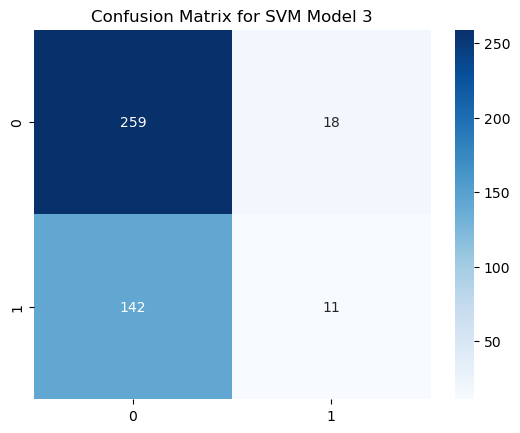

In [47]:
# Evaluate Model 2
predictions_3 = svm_model_3.predict(X_test)
print("Model 2 Classification Report:")
print(classification_report(y_test, predictions_3))


cm = confusion_matrix(y_test, predictions_3)


# Display the confusion matrix as a graph using seaborn's heatmap function
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Model 3")
plt.show()

### SVM All Model Confusion Matrix

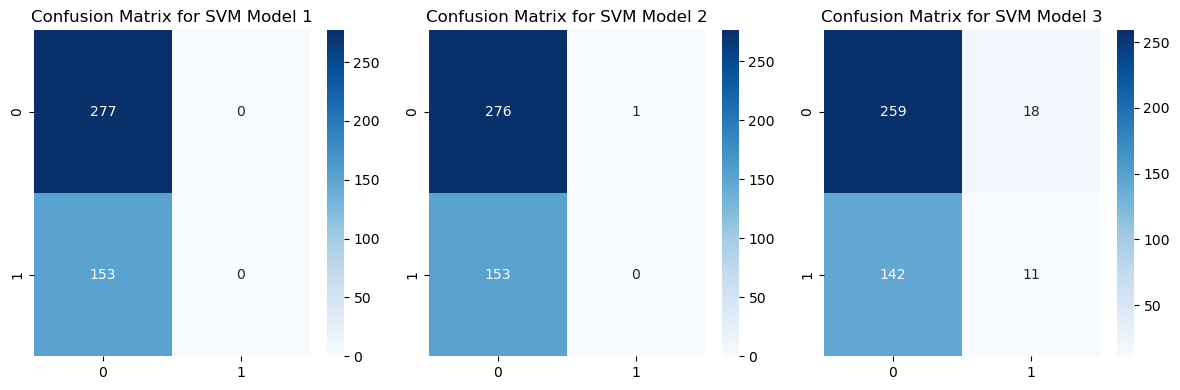

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrices
cm1 = confusion_matrix(y_test, predictions_1)
cm2 = confusion_matrix(y_test, predictions_2)
cm3 = confusion_matrix(y_test, predictions_3)

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Display the confusion matrices as heatmaps in the subplots
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix for SVM Model 1")
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix for SVM Model 2")
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Confusion Matrix for SVM Model 3")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Line plot to visualize the effect of different C values on the accuracy of an SVM model during hyperparameter tuning

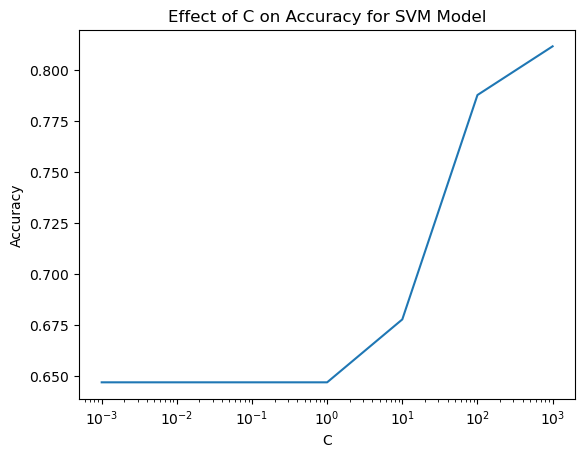

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Define the range of C values to test
C_values = np.logspace(-3, 3, 7)

# Initialize an empty list to store the accuracy scores
accuracy_scores = []

# Loop over the C values and compute the cross-validated accuracy score for each value
for C in C_values:
    svm_model = SVC(C=C)
    scores = cross_val_score(svm_model, X_train, y_train, cv=5)
    accuracy_scores.append(np.mean(scores))

# Plot the accuracy scores as a function of C
plt.semilogx(C_values, accuracy_scores)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Effect of C on Accuracy for SVM Model')
plt.show()

### Random Forest base Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model_1 = RandomForestClassifier()

# Train the model
rf_model_1.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.85      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.93      0.93       430



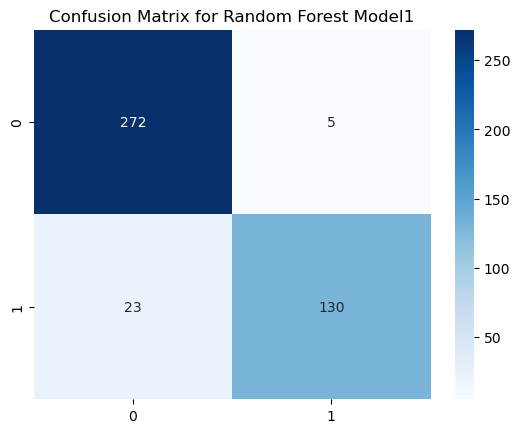

In [52]:
# Evaluate the Random Forest model
rf_predictions_1 = rf_model_1.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions_1))

# Create the confusion matrix
cm = confusion_matrix(y_test, rf_predictions_1)

# Display the confusion matrix as a graph using seaborn's heatmap function
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest Model1")
plt.show()


### Random Forest Model 2 - Using different number of estimators (trees) and a different maximum depth for the trees

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model with a different number of estimators and maximum depth
rf_model_2 = RandomForestClassifier(n_estimators=200, max_depth=10)

# Train the model
rf_model_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       277
           1       0.96      0.83      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



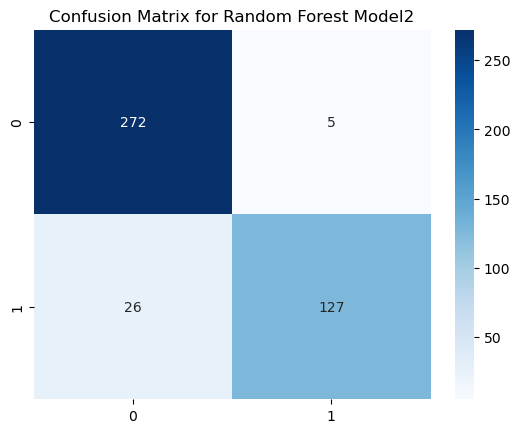

In [54]:
# Evaluate the Random Forest model
rf_predictions_2 = rf_model_2.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions_2))

# Create the confusion matrix
cm = confusion_matrix(y_test, rf_predictions_2)

# Display the confusion matrix as a graph using seaborn's heatmap function
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest Model2")
plt.show()


### Random Forest Model 3 - Using  different criterion for splitting the nodes (entropy instead of Gini impurity) and a different minimum number of samples required to split a node.

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model with a different criterion and minimum samples split
rf_model_3 = RandomForestClassifier(criterion='entropy', min_samples_split=5)

# Train the model
rf_model_3.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', min_samples_split=5)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       277
           1       0.96      0.88      0.92       153

    accuracy                           0.94       430
   macro avg       0.95      0.93      0.94       430
weighted avg       0.95      0.94      0.94       430



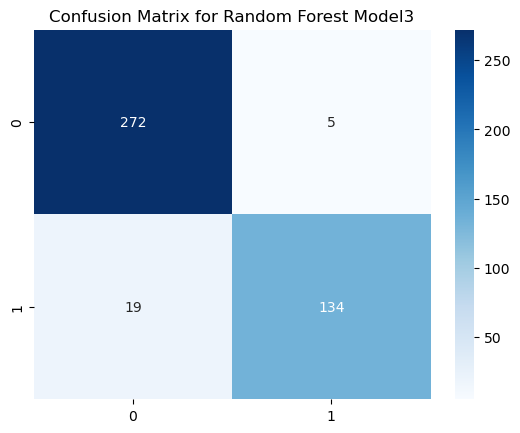

In [56]:
# Evaluate the Random Forest model
rf_predictions_3 = rf_model_3.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions_3))

# Create the confusion matrix
cm = confusion_matrix(y_test, rf_predictions_3)

# Display the confusion matrix as a graph using seaborn's heatmap function
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest Model3")
plt.show()


### Random Forest All model Confusion Matrix

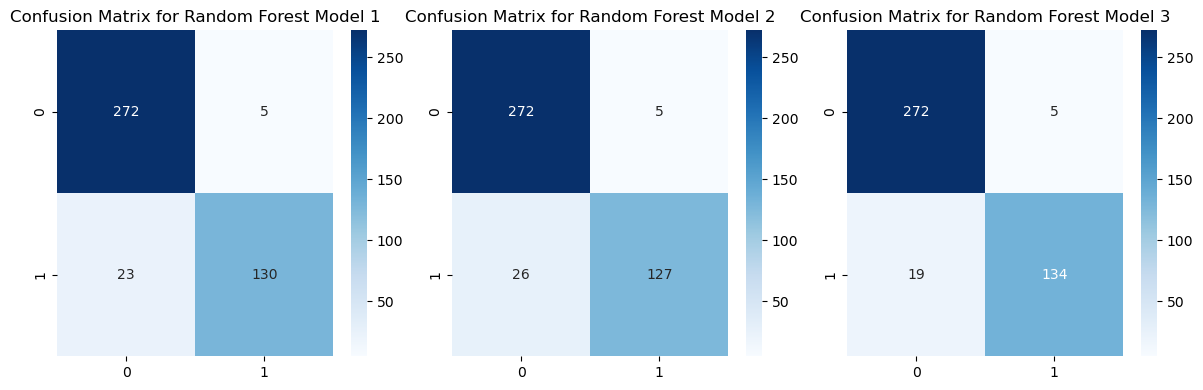

In [57]:
# Create the confusion matrices
cm1 = confusion_matrix(y_test, rf_predictions_1)
cm2 = confusion_matrix(y_test, rf_predictions_2)
cm3 = confusion_matrix(y_test, rf_predictions_3)

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Display the confusion matrices as heatmaps in the subplots
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix for Random Forest Model 1")
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix for Random Forest Model 2")
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Confusion Matrix for Random Forest Model 3")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Feature Importance for Best Random Forest Model

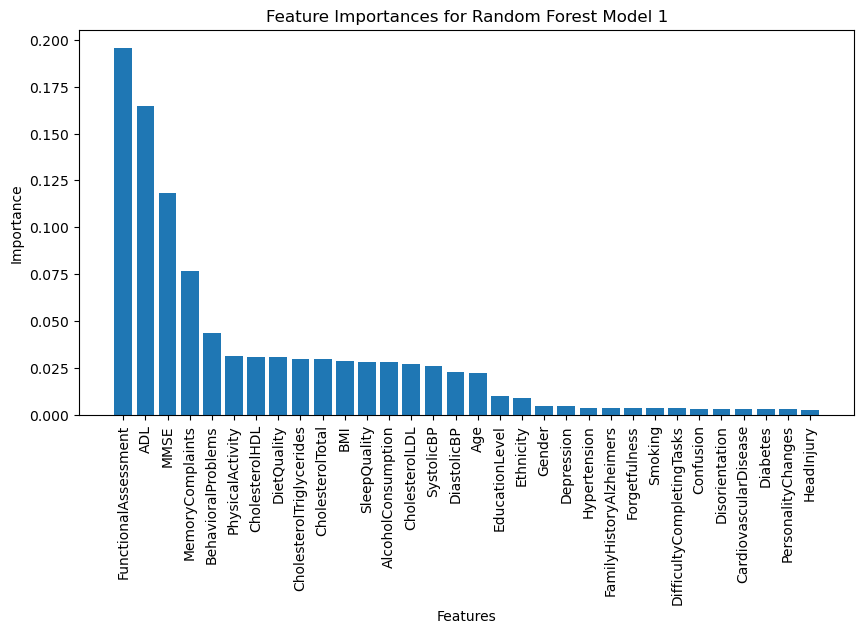

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Get the feature importances
importances = rf_model_1.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange the feature names and importances based on the sorted indices
names = [X.columns[i] for i in indices]

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances for Random Forest Model 1')
plt.show()

### Neural Network base model

In [59]:
from keras.models import Sequential
from keras.layers import Dense

# Create the Neural Network model
nn_model_1 = Sequential()
nn_model_1.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
nn_model_1.add(Dense(16, activation='relu'))
nn_model_1.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model_1.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
54/54 [==============================] - 1s 1ms/step - loss: 7.2479 - accuracy: 0.5323
Epoch 2/50
54/54 [==============================] - 0s 975us/step - loss: 1.7563 - accuracy: 0.5625
Epoch 3/50
54/54 [==============================] - 0s 1ms/step - loss: 1.1417 - accuracy: 0.5910
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.8169 - accuracy: 0.6329
Epoch 5/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6596 - accuracy: 0.6667
Epoch 6/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.6882
Epoch 7/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.6888
Epoch 8/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6023 - accuracy: 0.7004
Epoch 9/50
54/54 [==============================] - 0s 818us/step - loss: 0.5810 - accuracy: 0.7109
Epoch 10/50
54/54 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.7341
Epoch 11/50
54/

14/14 [==============================] - 0s 1ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.82       277
           1       0.91      0.27      0.41       153

    accuracy                           0.73       430
   macro avg       0.81      0.63      0.62       430
weighted avg       0.78      0.73      0.68       430



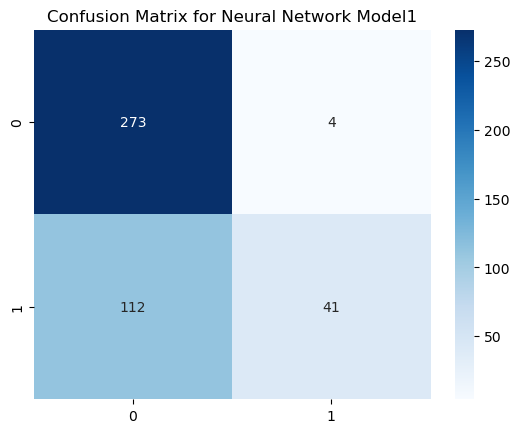

In [60]:
# Evaluate the Neural Network model
nn_predictions_1 = nn_model_1.predict(X_test)
nn_predictions_1 = (nn_model_1.predict(X_test) >= 0.5).astype(int)
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions_1))


# Create the confusion matrix
cm = confusion_matrix(y_test, nn_predictions_1)

# Display the confusion matrix as a graph using seaborn's heatmap function
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Neural Network Model1")
plt.show()

### Neural Network Model 2 - Using a different architecture for the model, with a different number of nodes in each layer and a different activation function for the output layer.

In [61]:
from keras.models import Sequential
from keras.layers import Dense

# Create the Neural Network model with a different architecture
nn_model_2 = Sequential()
nn_model_2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model_2.add(Dense(32, activation='relu'))
nn_model_2.add(Dense(1, activation='tanh'))

# Compile the model
nn_model_2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model_2.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
54/54 [==============================] - 1s 1ms/step - loss: 2.0593 - accuracy: 0.6469
Epoch 2/50
54/54 [==============================] - 0s 1ms/step - loss: 2.0593 - accuracy: 0.6469
Epoch 3/50
54/54 [==============================] - 0s 1ms/step - loss: 2.0593 - accuracy: 0.6469
Epoch 4/50
54/54 [==============================] - 0s 1ms/step - loss: 2.0593 - accuracy: 0.6469
Epoch 5/50
54/54 [==============================] - 0s 1ms/step - loss: 2.0593 - accuracy: 0.6469
Epoch 6/50
54/54 [==============================] - 0s 1ms/step - loss: 2.0593 - accuracy: 0.6469
Epoch 7/50
54/54 [==============================] - 0s 972us/step - loss: 2.0593 - accuracy: 0.6469
Epoch 8/50
54/54 [==============================] - 0s 1ms/step - loss: 2.0593 - accuracy: 0.6469
Epoch 9/50
54/54 [==============================] - 0s 1ms/step - loss: 2.0593 - accuracy: 0.6469
Epoch 10/50
54/54 [==============================] - 0s 931us/step - loss: 2.0593 - accuracy: 0.6469
Epoch 11/50
54/

14/14 [==============================] - 0s 1ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       277
           1       0.00      0.00      0.00       153

    accuracy                           0.64       430
   macro avg       0.32      0.50      0.39       430
weighted avg       0.41      0.64      0.50       430



c:\Users\ASUS ROG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS ROG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS ROG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


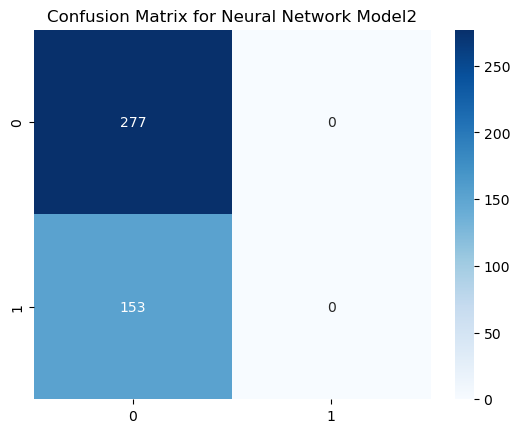

In [62]:
# Evaluate the Neural Network model
nn_predictions_2 = nn_model_2.predict(X_test)
nn_predictions_2 = (nn_model_2.predict(X_test) >= 0.5).astype(int)
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions_2))


# Create the confusion matrix
cm = confusion_matrix(y_test, nn_predictions_2)

# Display the confusion matrix as a graph using seaborn's heatmap function
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Neural Network Model2")
plt.show()

### Neural Network Model 3 - Using SGD optimization algorithm for the model, with a different learning rate and momentum.

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Create the Neural Network model
nn_model_3 = Sequential()
nn_model_3.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
nn_model_3.add(Dense(16, activation='relu'))
nn_model_3.add(Dense(1, activation='sigmoid'))

# Create the SGD optimizer with a different learning rate and momentum
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with the SGD optimizer
nn_model_3.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model
nn_model_3.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
54/54 [==============================] - 0s 934us/step - loss: 5.1743 - accuracy: 0.6387
Epoch 2/50
54/54 [==============================] - 0s 927us/step - loss: 0.6890 - accuracy: 0.6469
Epoch 3/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6469
Epoch 4/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.6469
Epoch 5/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6469
Epoch 6/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.6469
Epoch 7/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6469
Epoch 8/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.6469
Epoch 9/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6469
Epoch 10/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.6469
Epoch 11/50
54/

14/14 [==============================] - 0s 810us/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       277
           1       0.00      0.00      0.00       153

    accuracy                           0.64       430
   macro avg       0.32      0.50      0.39       430
weighted avg       0.41      0.64      0.50       430



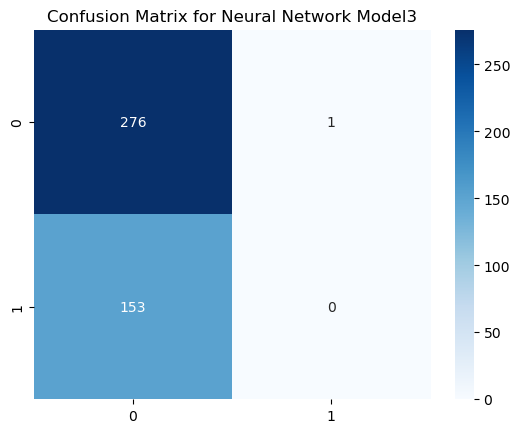

In [64]:
# Evaluate the Neural Network model
nn_predictions_3 = nn_model_3.predict(X_test)
nn_predictions_3 = (nn_model_3.predict(X_test) >= 0.5).astype(int)
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions_3))


# Create the confusion matrix
cm = confusion_matrix(y_test, nn_predictions_3)

# Display the confusion matrix as a graph using seaborn's heatmap function
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Neural Network Model3")
plt.show()

### All Neural Networks Model Confusion Matrix

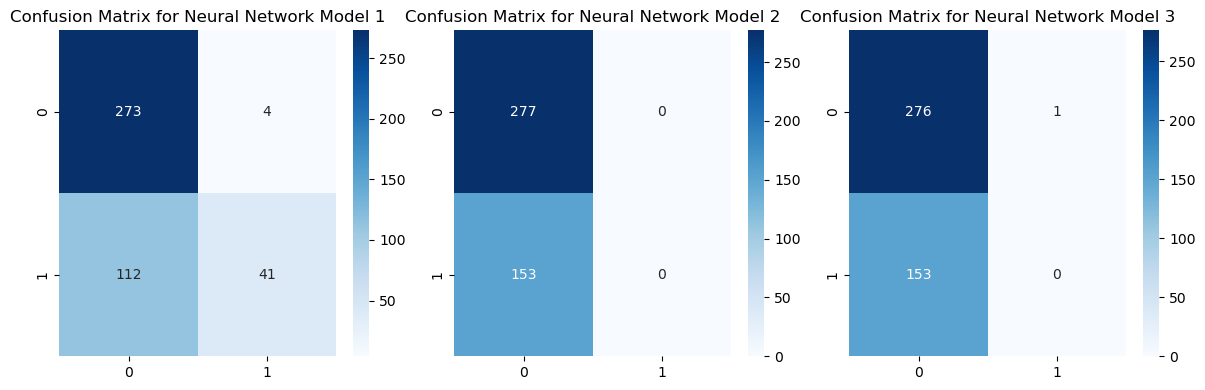

In [65]:
# Create the confusion matrices
cm1 = confusion_matrix(y_test, nn_predictions_1)
cm2 = confusion_matrix(y_test, nn_predictions_2)
cm3 = confusion_matrix(y_test, nn_predictions_3)

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Display the confusion matrices as heatmaps in the subplots
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix for Neural Network Model 1")
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix for Neural Network Model 2")
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Confusion Matrix for Neural Network Model 3")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Training and validation loss plot for the best Neural Network model.

Epoch 1/50
43/43 [==============================] - 0s 6ms/step - loss: 0.4113 - accuracy: 0.8145 - val_loss: 0.4329 - val_accuracy: 0.8023
Epoch 2/50
43/43 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8327 - val_loss: 0.5680 - val_accuracy: 0.7326
Epoch 3/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8058 - val_loss: 0.4252 - val_accuracy: 0.7936
Epoch 4/50
43/43 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8364 - val_loss: 0.4387 - val_accuracy: 0.8140
Epoch 5/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8225 - val_loss: 0.4254 - val_accuracy: 0.8110
Epoch 6/50
43/43 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8284 - val_loss: 0.4656 - val_accuracy: 0.7936
Epoch 7/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8044 - val_loss: 0.5095 - val_accuracy: 0.7762
Epoch 8/50
43/43 [==

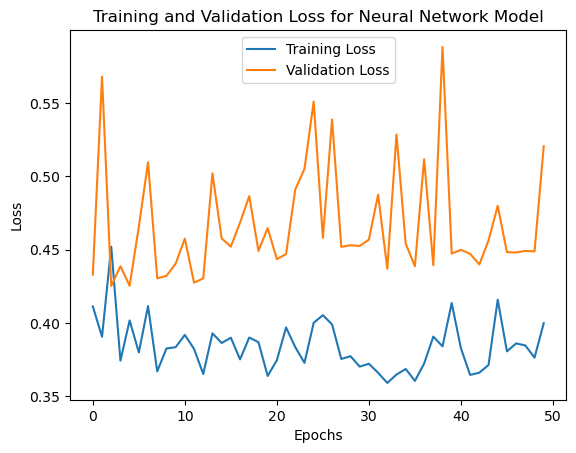

In [66]:
import matplotlib.pyplot as plt

# Train the model and store the training and validation loss
history = nn_model_1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Neural Network Model')
plt.legend()
plt.show()
